<a href="https://colab.research.google.com/github/Umashankari-G/python/blob/main/crime_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the dataset file (CSV format).


Saving Dataset.csv to Dataset.csv
------------------- Input Data ---------------
            Area_Name  Year                Group_Name Sub_Group_Name  \
0      Andhra Pradesh  2001  Serious Fraud - Cheating   2. Cheating    
1   Arunachal Pradesh  2001  Serious Fraud - Cheating   2. Cheating    
2               Assam  2001  Serious Fraud - Cheating   2. Cheating    
3               Bihar  2001  Serious Fraud - Cheating   2. Cheating    
4          Chandigarh  2001  Serious Fraud - Cheating   2. Cheating    
5        Chhattisgarh  2001  Serious Fraud - Cheating   2. Cheating    
6               Delhi  2001  Serious Fraud - Cheating   2. Cheating    
7                 Goa  2001  Serious Fraud - Cheating   2. Cheating    
8             Gujarat  2001  Serious Fraud - Cheating   2. Cheating    
9             Haryana  2001  Serious Fraud - Cheating   2. Cheating    
10   Himachal Pradesh  2001  Serious Fraud - Cheating   2. Cheating    
11    Jammu & Kashmir  2001  Serious Fraud - Cheating  

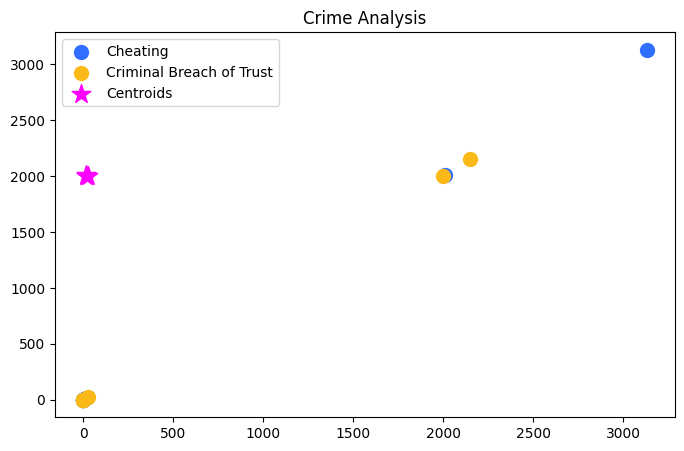

----------------------------------------------
================= Data Splitting =============
----------------------------------------------
Total number of rows in dataset: 448
Total number of rows in training data: 403
Total number of rows in testing data: 45
----------------------------------------------
================= Decision Tree ==============
----------------------------------------------
1. Confusion Matrix :
 [[22  0]
 [ 0 23]]
2. Accuracy : 66.18 %
3. Precision : 48.89 %
4. Sensitivity : 100.00 %
5. Specificity : 50.00 %
Enter the row index to predict (0 to 44): 23
Prediction: Criminal Breach of Trust


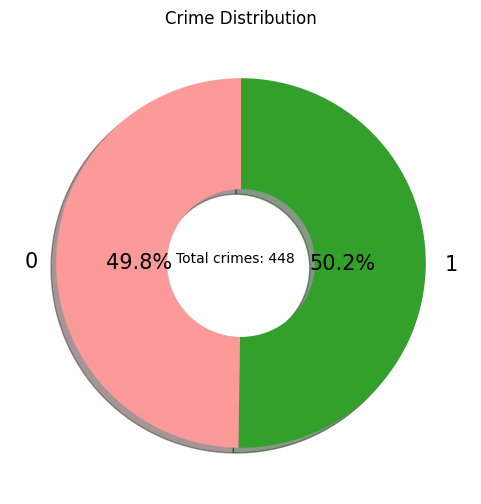

In [2]:
# ================= IMPORT LIBRARIES ==================
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# ================= FILE UPLOAD =================
print("Please upload the dataset file (CSV format).")
uploaded = files.upload()  # File upload dialog in Google Colab
filename = list(uploaded.keys())[0]  # Get the uploaded file name
dataframe = pd.read_csv(filename)

# ================= DISPLAY INPUT DATA =================
print("==============================================")
print("------------------- Input Data ---------------")
print("==============================================")
print(dataframe.head(20))

# ================= PREPROCESSING ====================
# 1. Check for missing values
print("=====================================================")
print("------------ Before Checking Missing Values ---------")
print("=====================================================")
print(dataframe.isnull().sum())

# Fill missing values with 0
dataframe = dataframe.fillna(0)
print("=====================================================")
print("------------ After Checking Missing Values ---------")
print("=====================================================")
print(dataframe.isnull().sum())

# 2. Label Encoding for categorical columns
print("==============================================")
print("------------ Before Label Encoding -----------")
print("==============================================")
print(dataframe['Group_Name'].head(15))

label_encoder = preprocessing.LabelEncoder()
dataframe['Group_Name'] = label_encoder.fit_transform(dataframe['Group_Name'])
dataframe['Sub_Group_Name'] = label_encoder.fit_transform(dataframe['Sub_Group_Name'])
dataframe['Area_Name'] = label_encoder.fit_transform(dataframe['Area_Name'])

print("==============================================")
print("------------ After Label Encoding -----------")
print("==============================================")
print(dataframe['Group_Name'].head(15))

# ================= CLUSTERING (Unsupervised) =================
x1 = dataframe.drop('Sub_Group_Name', axis=1)
y = dataframe['Sub_Group_Name']

print("----------------------------------------------")
print("================= K Means Clustering =============")
print("----------------------------------------------")

# KMeans clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x1)

# Plotting the clusters (Optional)
plt.subplots(figsize=(8,5))
plt.scatter(x1[y_kmeans == 1], x1[y_kmeans == 1], s=100, c='#306EFF', label='Cheating')
plt.scatter(x1[y_kmeans == 2], x1[y_kmeans == 2], s=100, c='#FBB917', label='Criminal Breach of Trust')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='#FF00FF', marker='*', label='Centroids')
plt.legend()
plt.title("Crime Analysis")
plt.show()
# ================= SPLITTING DATA =================
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.1, random_state=42)
print("----------------------------------------------")
print("================= Data Splitting =============")
print("----------------------------------------------")
print(f"Total number of rows in dataset: {dataframe.shape[0]}")
print(f"Total number of rows in training data: {x_train.shape[0]}")
print(f"Total number of rows in testing data: {x_test.shape[0]}")

# ================= DECISION TREE CLASSIFIER (Supervised) =================
print("----------------------------------------------")
print("================= Decision Tree ==============")
print("----------------------------------------------")

dt = DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=2, min_samples_leaf=5)
dt.fit(x_train, y_train)
dt_prediction = dt.predict(x_test)

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, dt_prediction)

# Calculate performance metrics
TP = cm[0][0]
FP = cm[1][1]
FN = cm[1][0]
TN = cm[1][1]
Total = TP + FP + FN + TN

print("1. Confusion Matrix :\n", cm)
accuracy1 = (((TP + TN) / Total)) * 100
precision = (TP / (TP + FP)) * 100 if (TP + FP) > 0 else 0
sensitivity = (TP / (TP + FN)) * 100 if (TP + FN) > 0 else 0
specificity = (TN / (TN + FP)) * 100 if (TN + FP) > 0 else 0

print(f"2. Accuracy : {accuracy1:.2f} %")
print(f"3. Precision : {precision:.2f} %")
print(f"4. Sensitivity : {sensitivity:.2f} %")
print(f"5. Specificity : {specificity:.2f} %")

# ================= PREDICTION (Optional) =================
# You can modify this part to allow user input for prediction
pred = int(input("Enter the row index to predict (0 to {}): ".format(len(dt_prediction) - 1)))

if dt_prediction[pred] == 0:
    print("===============================")
    print("Prediction: Cheating")
    print("===============================")
else:
    print("===============================")
    print("Prediction: Criminal Breach of Trust")
    print("===============================")

# ================= VISUALIZATION ==========================
# Pie chart of crime distribution
plt.figure(figsize=(6, 6))
counts = dataframe['Sub_Group_Name'].value_counts()
plt.pie(counts, labels=counts.index, startangle=90, counterclock=False, wedgeprops={'width': 0.6},
        autopct='%1.1f%%', pctdistance=0.55, textprops={'color': 'black', 'fontsize': 15}, shadow=True, colors=sns.color_palette("Paired")[3:])
plt.text(x=-0.35, y=0, s='Total crimes: {}'.format(dataframe.shape[0]))
plt.title('Crime Distribution')
plt.show()

